# Projet : Prédiction du prix des logements.

Utilisation du dataset disponible sur ce site : Kaggle Housing Dataset

https://www.kaggle.com/datasets/huyngohoang/housingcsv/code

Mon modèle s’appuie sur les caractéristiques suivantes :

Avg. Area Income → revenu moyen dans la zone

Avg. Area House Age → âge moyen des maisons

Avg. Area Number of Rooms → nombre moyen de pièces

Avg. Area Number of Bedrooms → nombre moyen de chambres

Area Population → population moyenne de la zone

In [20]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
# Importation du csv de ce site : https://www.kaggle.com/datasets/huyngohoang/housingcsv/code
path = kagglehub.dataset_download("huyngohoang/housingcsv")

Using Colab cache for faster access to the 'housingcsv' dataset.


In [22]:
# Chargement des données
data = pd.read_csv(path + "/housing.csv")

In [23]:
# Affichage des premières lignes
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [24]:
# Informations sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [25]:
# Statistiques descriptives
print(data.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [26]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [27]:
# Suppression de la colonne 'Address'
data = data.drop(columns=['Address'])

# Définir les features (X) et la cible (y)
X = data.drop('Price', axis=1)
y = data['Price']

In [28]:
# Séparation en plusieurs ensemble train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
# Création et entraînement du modèle

# LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# RandomForestRegressor
#model = RandomForestRegressor(n_estimators=200, random_state=42)
#model.fit(X_train, y_train)

# GradientBoostingRegressor
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
#model.fit(X_train, y_train)



LinearRegression()

In [30]:
# Evaluation du modèle

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne (MSE):", mse)
print("Coefficient de détermination (R²):", r2)

Erreur quadratique moyenne (MSE): 10089009299.499458
Coefficient de détermination (R²): 0.9179971706985317


Pour LinearRegression :

Erreur quadratique moyenne (MSE): 10089009299.499458

L’erreur quadratique moyenne est correcte pour ce type de données. Comme elle est calculée sur des prix en dollars, cela correspond à une erreur moyenne d’environ 100 000 $ par prédiction.

Coefficient de détermination (R²): 0.9179971706985317

Le coefficient de détermination est proche de 1, ce qui indique que le modèle parvient à prédire les prix avec une très bonne précision.

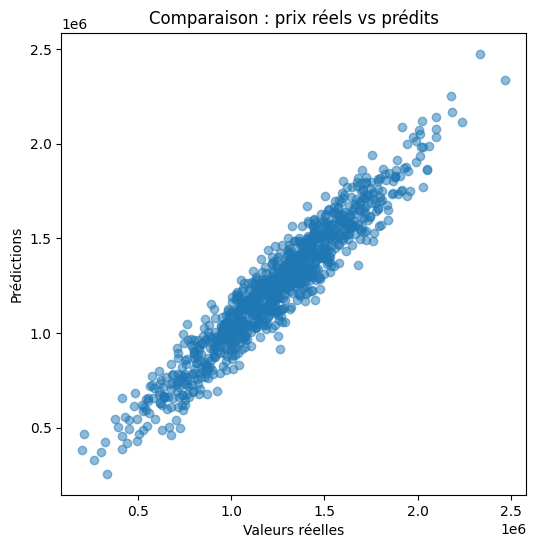

In [31]:
# Visualisation des résultats

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison : prix réels vs prédits")
plt.show()

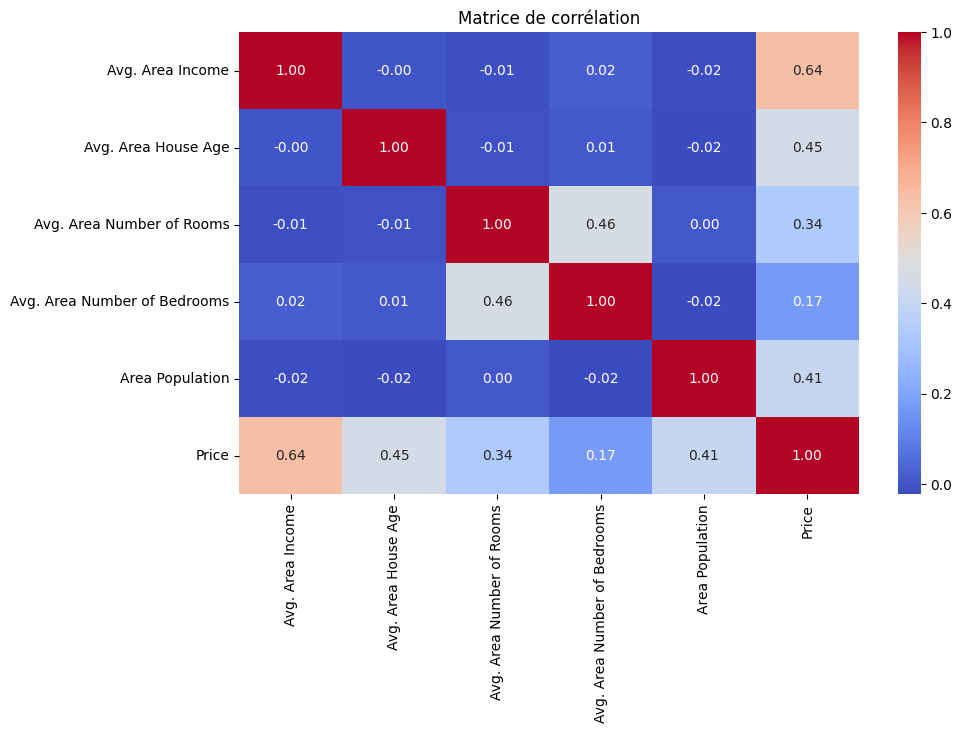

In [32]:
# Visualiser les corrélations entre variables
import seaborn as sns
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Avg. Area Income à une forte corrélation positive avec Price.

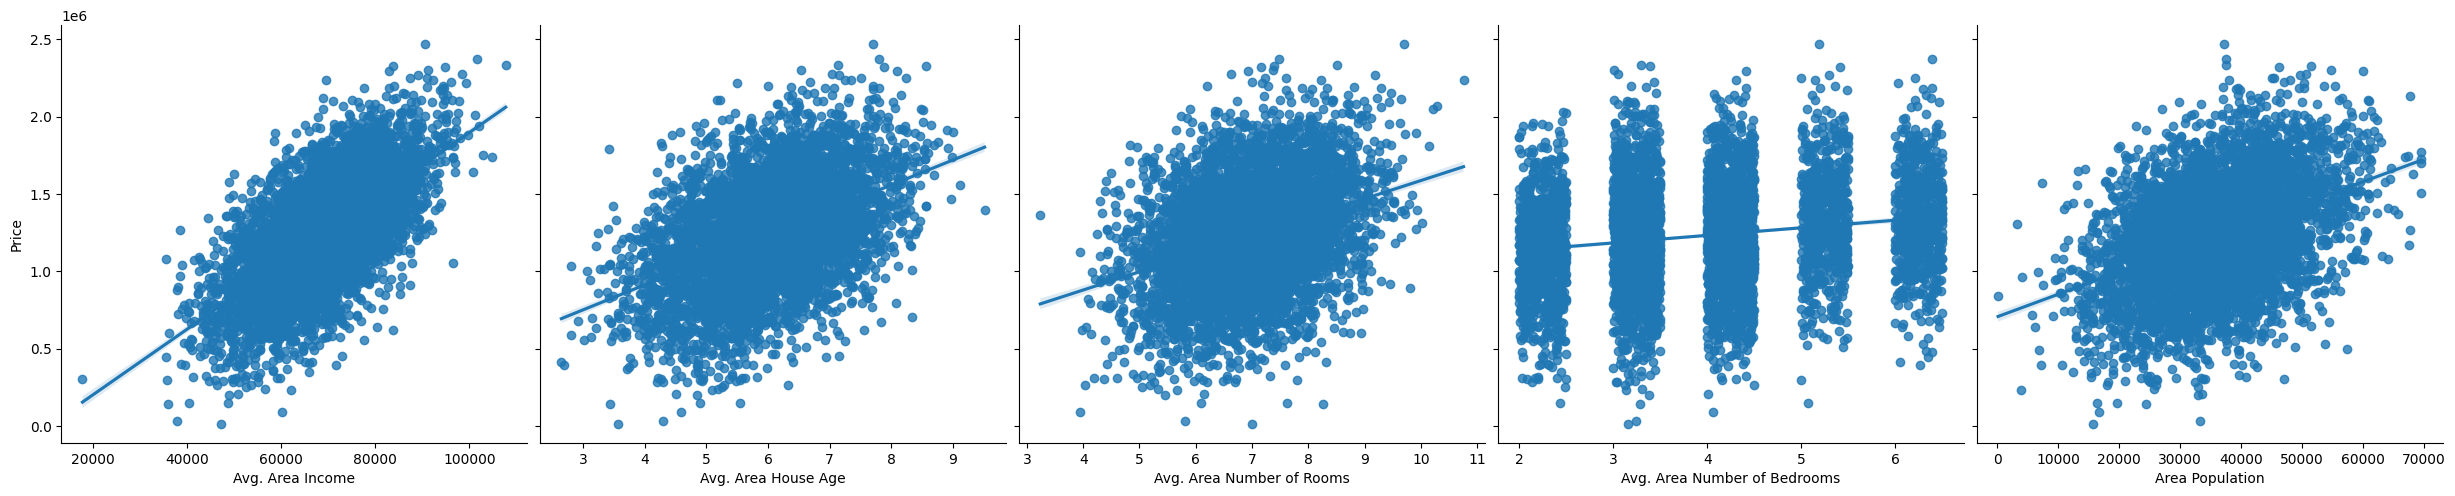

In [33]:
x_vars = data.drop(columns='Price').columns.tolist()
y_var = 'Price'

sns.pairplot(data, x_vars=x_vars, y_vars=y_var, height=5, kind='reg')
plt.show()


# Prédiction manuelle :

In [34]:
# Exemple de données pour une nouvelle maison
house = {
    'Avg. Area Income': [70000],
    'Avg. Area House Age': [6],
    'Avg. Area Number of Rooms': [7],
    'Avg. Area Number of Bedrooms': [4],
    'Area Population': [35000]
}

new_house = pd.DataFrame(house)

# Prédiction du prix
price_pred = model.predict(new_house)

print(f"Prix estimé du logement : {price_pred[0]:,.2f} $")

Prix estimé du logement : 1,250,170.95 $


In [ ]:
# Exemple de données pour plusieurs maisons
houses = {
    'Avg. Area Income': [70000, 55000, 80000],
    'Avg. Area House Age': [6, 8, 5],
    'Avg. Area Number of Rooms': [7, 6, 8],
    'Avg. Area Number of Bedrooms': [4, 3, 5],
    'Area Population': [35000, 25000, 40000]
}

new_houses = pd.DataFrame(houses)

# Prédiction du prix
price_pred = model.predict(new_houses)

for i in range(len(houses['Avg. Area Income'])):
  print(f"Prix estimé du logement : {price_pred[i]:,.2f} $")

Prix estimé du logement : 1,250,170.95 $
Prix estimé du logement : 979,953.30 $
Prix estimé du logement : 1,500,442.49 $


# Sauvegarder un modèle sans le réentraîner :

In [35]:
import joblib

# Sauvegarde du modèle
joblib.dump(model, 'modele_prix_logement.joblib')

['modele_prix_logement.joblib']

In [36]:
# Chargement du modèle sauvegardé
loaded_model = joblib.load('modele_prix_logement.joblib')

In [37]:
# Exemple de données pour une nouvelle maison
house = {
    'Avg. Area Income': [70000],
    'Avg. Area House Age': [6],
    'Avg. Area Number of Rooms': [7],
    'Avg. Area Number of Bedrooms': [4],
    'Area Population': [35000]
}

new_house = pd.DataFrame(house)

# Utilisation du modèle pour prédire
price_pred = loaded_model.predict(new_house)

print(f"Prix estimé du logement : {price_pred[0]:,.2f} $")

Prix estimé du logement : 1,250,170.95 $
